## Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../datasets/titanic_train.csv')
df_test = pd.read_csv('../datasets/titanic_test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


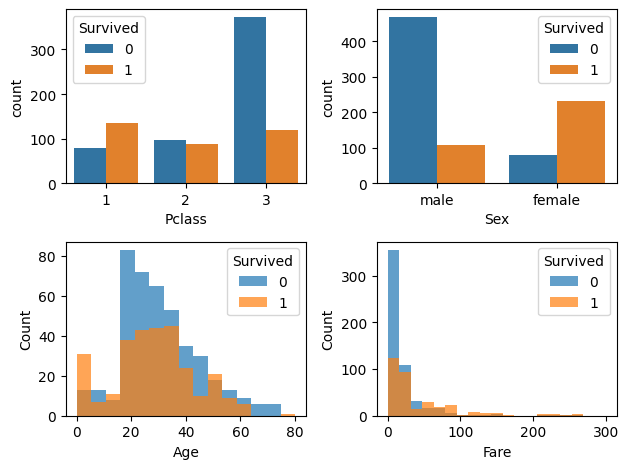

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2)
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=axes[0, 0])
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=axes[0, 1])

axes[1, 0].hist(df_train.loc[df_train['Survived'] == 0, 'Age'].dropna(), bins=np.linspace(0, 80, 16), alpha=0.7, label='0')
axes[1, 0].hist(df_train.loc[df_train['Survived'] == 1, 'Age'].dropna(), bins=np.linspace(0, 80, 16), alpha=0.7, label='1')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Survived')

axes[1, 1].hist(df_train.loc[df_train['Survived'] == 0, 'Fare'].dropna(), bins=np.linspace(0, 300, 20), alpha=0.7, label='0')
axes[1, 1].hist(df_train.loc[df_train['Survived'] == 1, 'Fare'].dropna(), bins=np.linspace(0, 300, 20), alpha=0.7, label='1')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Survived')
fig.tight_layout()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df = pd.concat([df_train, df_test], sort=False)

In [7]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

In [9]:
categorical_features = ['Sex', 'Pclass']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("Survived", axis=1), df["Survived"], test_size=0.2, random_state=0
)

X_train.shape, X_test.shape


((1047, 4), (262, 4))

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("Fare", SimpleImputer(strategy="mean"), ["Fare"]),
        ("Age", SimpleImputer(strategy="mean"), ["Age"]),
        ("Sex", OrdinalEncoder(), ["Sex"]),
    ],
    remainder="passthrough",
)


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty="l2", max_iter=10000, solver="sag", random_state=0)

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])


In [13]:
pipeline.fit(df_train[['Pclass', 'Sex', 'Age', 'Fare']], df_train["Survived"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Fare', SimpleImputer(),
                                                  ['Fare']),
                                                 ('Age', SimpleImputer(),
                                                  ['Age']),
                                                 ('Sex', OrdinalEncoder(),
                                                  ['Sex'])])),
                ('model',
                 LogisticRegression(max_iter=10000, random_state=0,
                                    solver='sag'))])

In [14]:
from sklearn import metrics

y_test = df_train['Survived']
y_pred = pipeline.predict(df_train[['Pclass', 'Sex', 'Age', 'Fare']])
metrics.accuracy_score(y_test, y_pred)

0.7822671156004489